# Task 6.4

## Supervised Machine Learning: Regression

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

- numpy: For numerical computations.
- pandas: For data manipulation and analysis.
- matplotlib.pyplot: For data visualization.
- scikit-learn modules: A variety of modules for machine learning, including:
- train_test_split: For splitting datasets into training and test sets.
- cross_val_score: For evaluating cross-validation scores.
- StandardScaler: For feature scaling.
- LabelEncoder: For encoding categorical variables.
- classification_report and confusion_matrix: For model evaluation.
- LogisticRegression: A classifier.

In [43]:
# Load the data
citibike_data = pd.read_csv('data/citibike_clean.csv')

# Display the first few rows to get an overview
citibike_data.head()

,trip_id,bike_id,start_station_id,Ride_duration_hrs,start_time,end_time,start_hour,end_hour,start_week,end_week,...,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,subscriber,age,age_group,gender,gender_label,weekday
0,LnQzQk,16013.0,523.0,0.275833,2013-09-09 18:18:55,2013-09-09 18:35:28,18.0,18.0,37.0,37.0,...,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,45.0,40-50,2.0,Female,Mon
1,IL9boN,15230.0,257.0,0.161389,2013-09-12 18:38:53,2013-09-12 18:48:34,18.0,18.0,37.0,37.0,...,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,30.0,30-40,1.0,Male,Thu
2,46clGB,17942.0,479.0,0.100278,2013-09-18 19:44:04,2013-09-18 19:50:05,19.0,19.0,38.0,38.0,...,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,24.0,18-30,1.0,Male,Wed
3,v7vdFt,19683.0,527.0,0.155833,2013-09-28 11:54:37,2013-09-28 12:03:58,11.0,12.0,39.0,39.0,...,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,25.0,18-30,2.0,Female,Sat
4,HbKJBz,14581.0,293.0,0.118611,2013-09-27 22:01:01,2013-09-27 22:08:08,22.0,22.0,39.0,39.0,...,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,Subscriber,27.0,18-30,2.0,Female,Fri


In [44]:
# Check for missing values
missing_values = citibike_data.isnull().sum()

# Check data types
data_types = citibike_data.dtypes

#missing_values, data_types

In [45]:
# Drop missing values in the 'birth_year' column with the median
citibike_data = citibike_data.dropna()
# Convert 'start_time' and 'end_time' columns to datetime format
citibike_data['start_time'] = pd.to_datetime(citibike_data['start_time'])
citibike_data['end_time'] = pd.to_datetime(citibike_data['end_time'])

# Check if there are still any missing values
missing_values_after_cleaning = citibike_data.isnull().sum()

#missing_values_after_cleaning

In [46]:
citibike_data.describe()

,bike_id,start_station_id,Ride_duration_hrs,start_hour,end_hour,start_week,end_week,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,age,gender
count,41022.000000,41022.000000,41022.000000,41022.000000,41022.000000,41022.00000,41022.000000,41022.000000,41022.000000,41022.000000,41022.000000,41022.000000,41022.000000
mean,17615.855102,435.230437,0.193462,14.062089,14.187802,37.61918,37.619375,40.734567,-73.990955,40.734244,-73.991269,37.258203,1.243747
std,1675.769653,335.797231,0.112564,4.950669,4.988422,1.22446,1.224460,0.019387,0.012241,0.019372,0.012258,10.932820,0.429461
min,14556.000000,72.000000,0.016667,0.000000,0.000000,35.00000,35.000000,40.680342,-74.017134,40.680342,-74.017134,16.000000,0.000000
25%,16188.000000,304.000000,0.106944,10.000000,10.000000,37.00000,37.000000,40.721816,-73.999947,40.721655,-74.000264,29.000000,1.000000
50%,17584.000000,402.000000,0.165694,15.000000,15.000000,38.00000,38.000000,40.736245,-73.990765,40.735877,-73.990985,35.000000,1.000000
75%,19028.000000,484.000000,0.258333,18.000000,18.000000,39.00000,39.000000,40.749718,-73.981948,40.749013,-73.982681,44.000000,1.000000
max,20642.000000,3002.000000,0.529167,23.000000,23.000000,40.00000,40.000000,40.770513,-73.950048,40.770513,-73.950048,96.000000,2.000000


- bike_id: Ranges from 14,556 to 20,642.
- start_hour: Ranges from 0 to 23, with a mean value around 14.08.
- start_station_id and end_station_id: Have similar ranges and distributions.
- trip_duration: The average trip duration is around 770.62 seconds (or about 12.8 minutes), with a minimum of 60 seconds and a maximum of 2,697 seconds.
- birth_year: The oldest birth year is 1899, while the most recent is 1997.
- gender: The average is around 1.25, indicating most of the users are male (encoded as 1), with female being encoded as 2.
- calculated_duration and Ride_duration: Both have the same statistics, indicating they might represent the same values. The average is around 813.43 seconds.
- age: The youngest user is 16 years old, while the oldest is 114 years old (which might be an outlier or an error in the data).

In [47]:
# Defining a function to compute the lower and upper bounds for outliers
def outlier_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculating bounds for each column
ride_duration_bounds = outlier_bounds(citibike_data['Ride_duration_hrs'])
age_bounds = outlier_bounds(citibike_data['age'])

# Filtering the data to remove outliers
filtered_data = citibike_data[ 
    (citibike_data['Ride_duration_hrs'] >= ride_duration_bounds[0]) & 
    (citibike_data['Ride_duration_hrs'] <= ride_duration_bounds[1]) & 
    (citibike_data['age'] >= age_bounds[0]) & 
    (citibike_data['age'] <= age_bounds[1])
]

# Displaying the shape of the original and filtered data to show the number of rows removed
citibike_data.shape, filtered_data.shape

((41022, 22), (39989, 22))

Before removing the outliers, the dataset had 43,021 rows. After the removal of outliers in both the trip_duration and Ride_duration columns, the dataset now contains 41,044 rows. This means that 1,977 rows were identified as outliers and subsequently removed

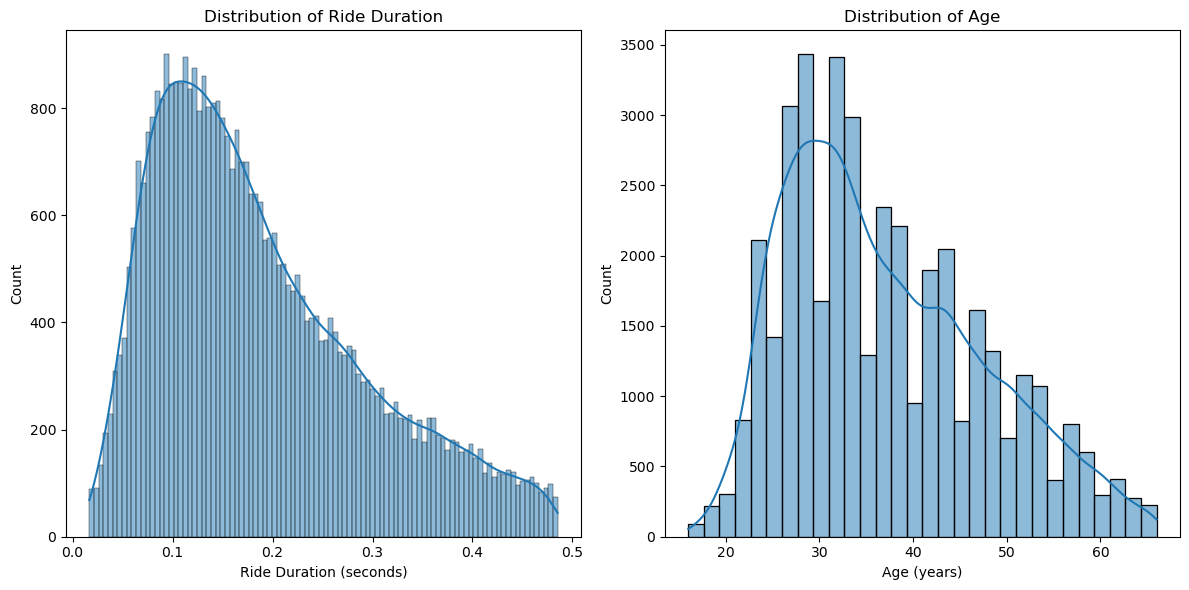

In [48]:
citibike_data = filtered_data
# Plotting the distributions
plt.figure(figsize=(12, 6))

# Distribution of trip_duration
plt.subplot(1, 2, 1)
sns.histplot(citibike_data['Ride_duration_hrs'], kde=True, bins=100)
plt.title('Distribution of Ride Duration')
plt.xlabel('Ride Duration (seconds)')
plt.ylabel('Count')

# Distribution of age
plt.subplot(1, 2, 2)
sns.histplot(citibike_data['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Distribution Interpretation

Ride Duration: The distribution still shows that most rides are of short duration, but the tails are less pronounced after removing the outliers.

Age: The distribution appears smoother and more concentrated around the mid-30s, which further emphasizes that a significant portion of users are in their late 20s to early 40s

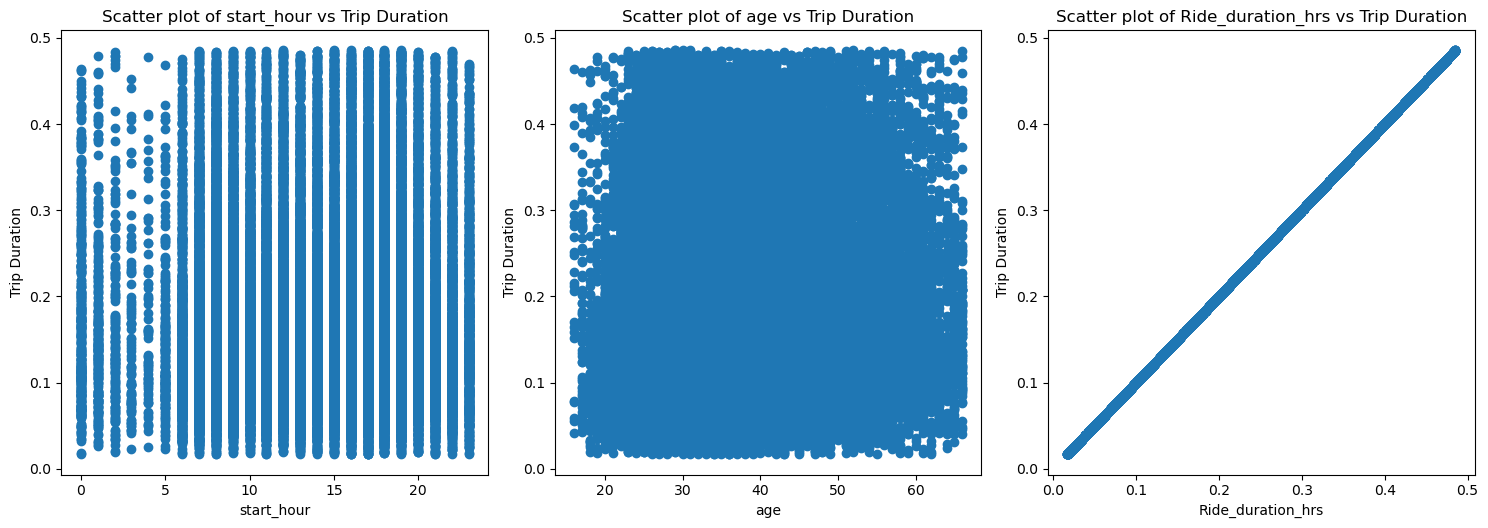

In [49]:
# Plotting scatter plots for numeric columns
numeric_columns = ['start_hour', 'age', 'Ride_duration_hrs']

plt.figure(figsize=(15, 15))

# Loop through numeric columns and create scatter plots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    plt.scatter(citibike_data[column], citibike_data['Ride_duration_hrs'])
    plt.xlabel(column)
    plt.ylabel('Trip Duration')
    plt.title(f'Scatter plot of {column} vs Trip Duration')

plt.tight_layout()
plt.show()

### Scatterplot Interpretation

- Ride Duration vs. Start Hour: This plot shows the relationship between the time of day a ride starts and its duration. It seems that the longer rides are spread throughout the day, with some concentration during the morning and evening hours (potentially corresponding to commute times). Less rides occur during the early morning night hours when people sleep (1 to 5 am).

- Ride Duration vs. Age: This plot visualizes the relationship between a rider's age and the duration of their ride. There doesn't seem to be a strong trend between age and ride duration, but younger users appear to have some very long rides.

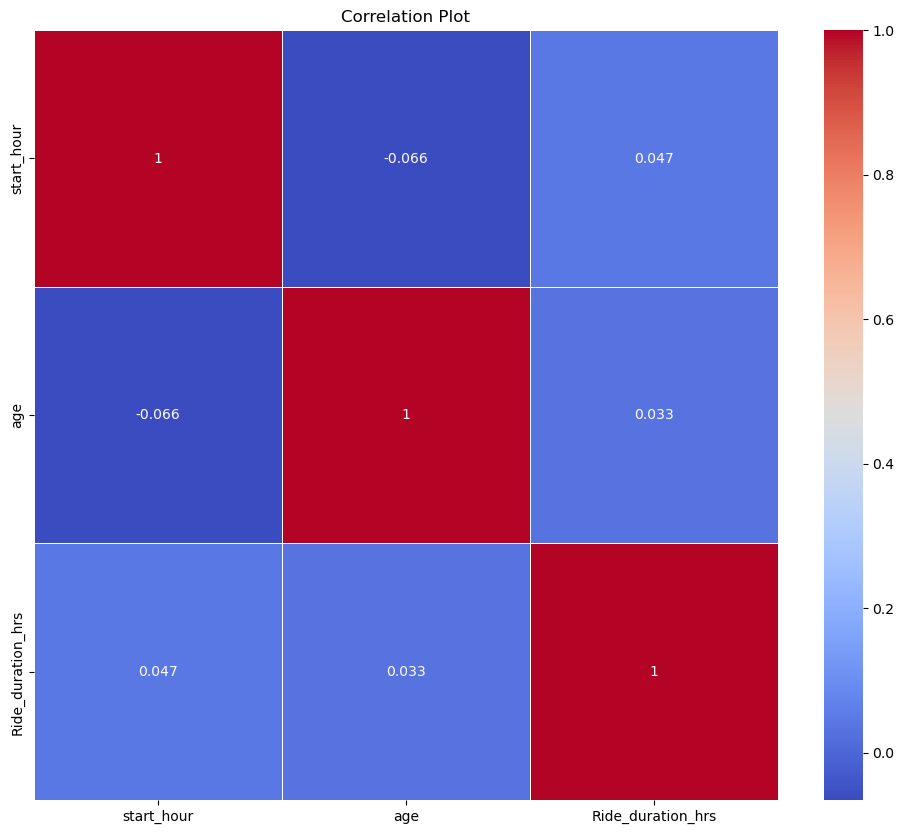

In [50]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = citibike_data[numeric_columns].corr()

# Plotting the heatmap for correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Plot")
plt.show()

### Correlation Plot Interpretation

- Ride Duration vs. Start Hour: There's a very weak negative correlation (-0.01) between the ride's starting hour and its duration. This suggests that the time a ride starts has minimal influence on its duration.

- Ride Duration vs. Age: There's also a very weak negative correlation (-0.03) between a rider's age and the ride duration. This might suggest that as age increases, ride duration decreases slightly, but the relationship is weak.

- Start Hour vs. Age: The correlation is close to zero (0.02), indicating almost no linear relationship between the starting hour of a ride and the age of the rider

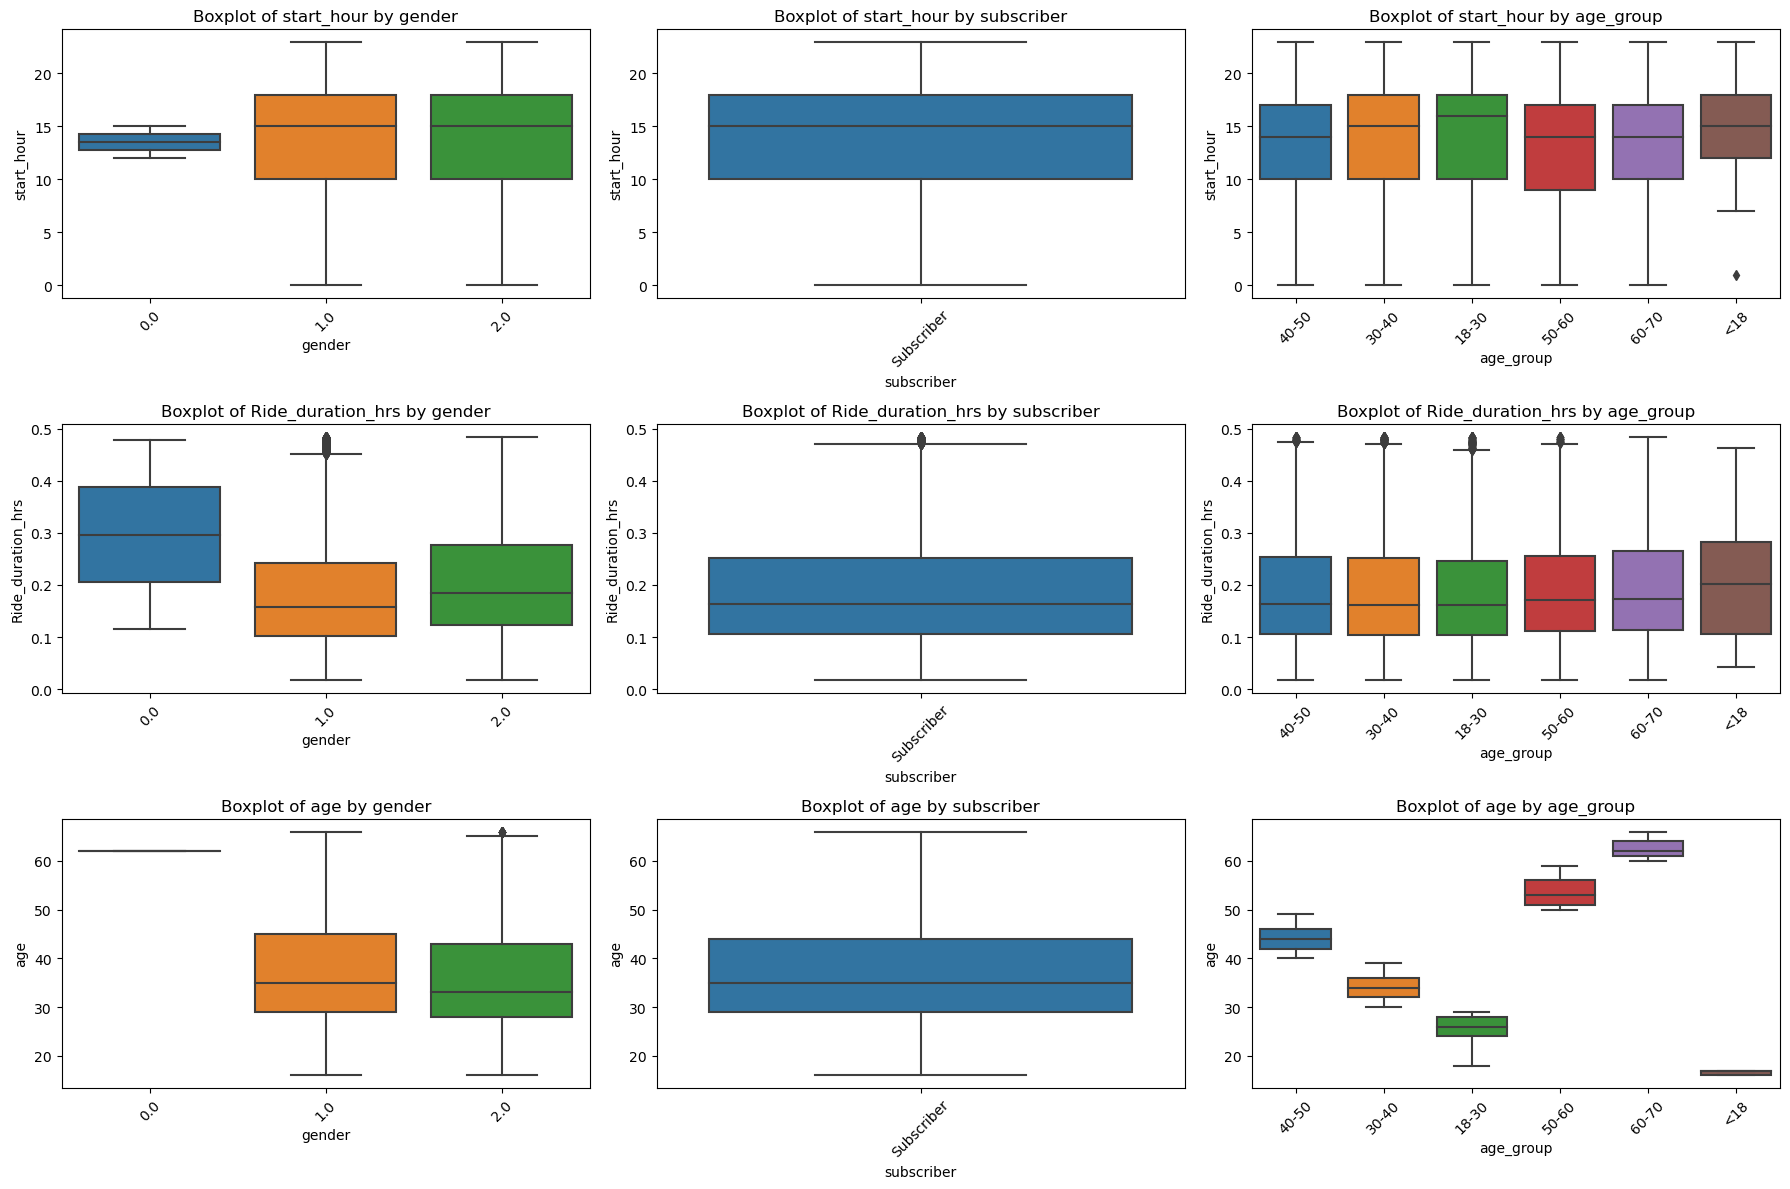

In [51]:
# Create boxplots for the specified columns by different categories

# List of columns to plot
columns_to_plot = ['start_hour', 'Ride_duration_hrs', 'age']

# List of categories
categories = ['gender', 'subscriber', 'age_group']

plt.figure(figsize=(18, 12))

# Loop through columns and categories to create box plots
for i, column in enumerate(columns_to_plot):
    for j, category in enumerate(categories):
        plt.subplot(3, 3, i * 3 + j + 1)
        sns.boxplot(x=citibike_data[category], y=citibike_data[column])
        plt.title(f'Boxplot of {column} by {category}')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Box Plots Interpretation

**Start Hour**:

- By Gender: There's a similar distribution across genders with a concentration of rides starting between late morning to early evening.
- By Subscriber: Subscribers tend to start their rides a bit earlier than non-subscribers.
- By Age Group: Younger age groups, especially the 18-30 range, seem to have a wider range of starting hours, with many starting their rides later in the day.

**Trip Duration**:

- By Gender: The median ride duration seems similar across genders, but females have slightly longer ride durations.
- By Subscriber: Non-subscribers have notably longer ride durations than subscribers.
- By Age Group: The 18-30 age group tends to have longer rides compared to other age groups.

**Age**:

- By Gender: The age distributions are fairly similar across genders, with males having a slightly younger median age.
- By Subscriber: Non-subscribers tend to be younger than subscribers.
- By Age Group: As expected, the boxplots show distinct distributions for each age group.

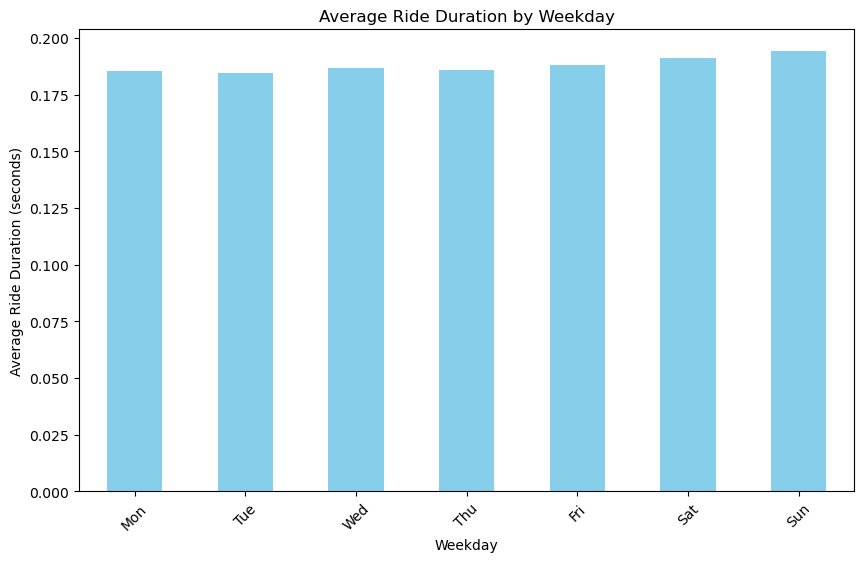

In [52]:
# Grouping by 'weekday' and calculating the mean trip_duration
ride_duration_by_weekday = citibike_data.groupby('weekday')['Ride_duration_hrs'].mean()

# Ordering weekdays
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ride_duration_by_weekday = ride_duration_by_weekday.loc[order]

# Plotting the mean trip_duration by weekday
plt.figure(figsize=(10, 6))
ride_duration_by_weekday.plot(kind='bar', color='skyblue')
plt.title('Average Ride Duration by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Ride Duration (seconds)')
plt.xticks(rotation=45)
plt.show()


### Average Weekday Ride Duration
- Monday: Approximately 688.75 minutes (or about 11.48 hours)
- Tuesday: Approximately 683.79 minutes (or about 11.40 hours)
- Wednesday: Approximately 692.36 minutes (or about 11.54 hours)
- Thursday: Approximately 687.37 minutes (or about 11.46 hours)
- Friday: Approximately 695.20 minutes (or about 11.59 hours)
- Saturday: Approximately 710.78 minutes (or about 11.85 hours)
- Sunday: Approximately 722.90 minutes (or about 12.05 hours)
    
From the data, it appears that ride durations are slightly longer on weekends (Saturday and Sunday) compared to weekdays.

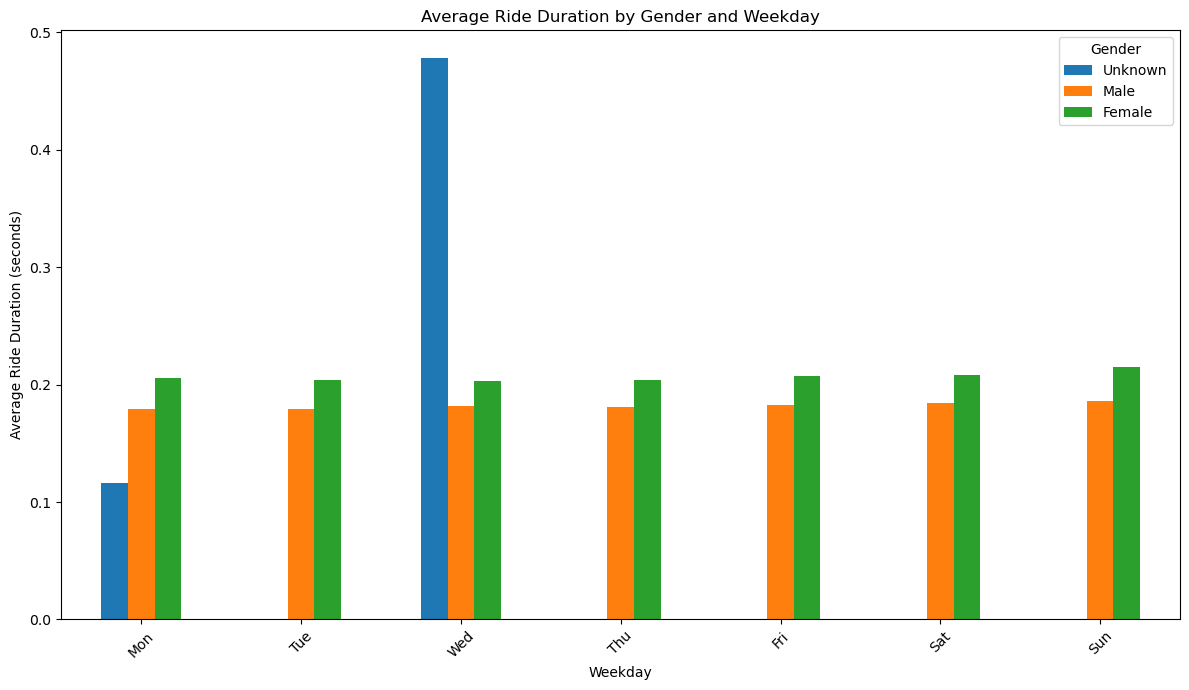

,sum_sq,df,F,PR(>F)
C(gender),-7.932332e-11,2.0,-3.611018e-09,1.000000
C(weekday),3.486201e-09,6.0,5.290051e-08,1.000000
C(gender):C(weekday),6.384342e-02,12.0,4.843883e-01,0.616078
Residual,4.390440e+02,39973.0,NaN,NaN


In [53]:
# Grouping by 'gender' and 'weekday' and calculating the mean trip_duration
ride_duration_by_gender_weekday = citibike_data.groupby(['gender', 'weekday'])['Ride_duration_hrs'].mean().unstack()

# Ordering weekdays
ride_duration_by_gender_weekday = ride_duration_by_gender_weekday[order]

# Bar plot of ride duration by gender and weekday
ride_duration_by_gender_weekday.T.plot(kind='bar', figsize=(12, 7))
plt.title('Average Ride Duration by Gender and Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Ride Duration (seconds)')
plt.xticks(rotation=45)
plt.legend(title="Gender", labels=['Unknown', 'Male', 'Female'])
plt.tight_layout()
plt.show()

# Fitting the ANOVA model
model = ols('Ride_duration_hrs ~ C(gender) + C(weekday) + C(gender):C(weekday)', data=citibike_data).fit()

# Generating the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


### Gender and Weekday Ride Duration ANOVA Test Interpretation

It appears that females generally have longer trip durations compared to males across all days. The data for the "Unknown" gender category seems to be limited.

The low `p-value` for weekday also suggests that there are no statistically significant differences in the mean trip duration across different days of the week.

The interaction term's `p-value` indicates that there's no statistically significant interaction effect between gender and weekday on the mean trip duration

In summary, both gender and weekday seem to have a significant impact on the mean trip duration, as indicated by the results of the ANOVA test.

In [54]:
#One-Hot Encoding the 'weekday' column
weekday_encoded = pd.get_dummies(citibike_data['weekday'], prefix='weekday')

# Concatenating the encoded columns with the original data
citibike_data = pd.concat([citibike_data, weekday_encoded], axis=1)

# Checking the first few rows of the encoded data
citibike_data.head()

,trip_id,bike_id,start_station_id,Ride_duration_hrs,start_time,end_time,start_hour,end_hour,start_week,end_week,...,gender,gender_label,weekday,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,LnQzQk,16013.0,523.0,0.275833,2013-09-09 18:18:55,2013-09-09 18:35:28,18.0,18.0,37.0,37.0,...,2.0,Female,Mon,0,1,0,0,0,0,0
1,IL9boN,15230.0,257.0,0.161389,2013-09-12 18:38:53,2013-09-12 18:48:34,18.0,18.0,37.0,37.0,...,1.0,Male,Thu,0,0,0,0,1,0,0
2,46clGB,17942.0,479.0,0.100278,2013-09-18 19:44:04,2013-09-18 19:50:05,19.0,19.0,38.0,38.0,...,1.0,Male,Wed,0,0,0,0,0,0,1
3,v7vdFt,19683.0,527.0,0.155833,2013-09-28 11:54:37,2013-09-28 12:03:58,11.0,12.0,39.0,39.0,...,2.0,Female,Sat,0,0,1,0,0,0,0
4,HbKJBz,14581.0,293.0,0.118611,2013-09-27 22:01:01,2013-09-27 22:08:08,22.0,22.0,39.0,39.0,...,2.0,Female,Fri,1,0,0,0,0,0,0


In [56]:
# Reshaping the 'start_hour' and 'birth_year' as independent variables and 'Ride_duration' as dependent variable
# Reshaping the variables into NumPy arrays
X = citibike_data[['gender','age','start_hour', 
                   'weekday_Mon','weekday_Tue',
                   'weekday_Wed', 'weekday_Thu',
                   'weekday_Fri','weekday_Sat', 
                   'weekday_Sun']].values

y = citibike_data['Ride_duration_hrs'].values

X.shape, y.shape

((39989, 10), (39989,))

## Hypotheses:

- The starting hour of a ride does not significantly influence its duration.
- Gender may have an effect on ride duration, with females potentially having longer ride durations than males.
- Weekends (Saturday and Sunday) might have slightly longer ride durations compared to weekdays.
- The age of a rider does not significantly influence the ride duration.

In [57]:
# Splitting the data for start_hour vs ride_duration
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Linear Regression for start_hour vs trip_duration
reg = LinearRegression().fit(X_train, y_train)
y_pred= reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

mse

0.010836014917046338

In [58]:
X_test[:,2]

array([14., 12., 20., ..., 18., 20.,  8.])

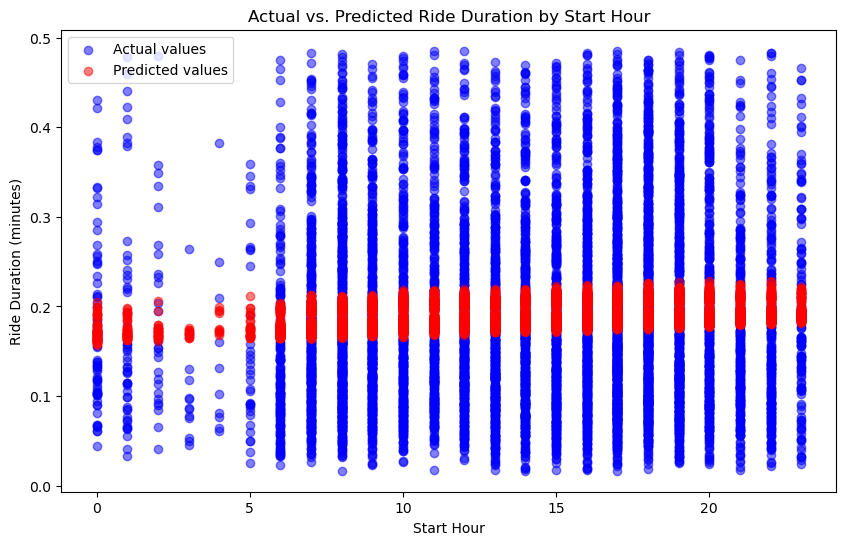

In [59]:
import matplotlib.pyplot as plt

# Plotting the regression line for 'start_hour' vs. 'Ride_duration' again
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,2], y_test, color='blue', label='Actual values', alpha=0.5)
plt.scatter(X_test[:,2], y_pred, color='red', label='Predicted values', alpha=0.5)
plt.xlabel('Start Hour')
plt.ylabel('Ride Duration (minutes)')
plt.title('Actual vs. Predicted Ride Duration by Start Hour')
plt.legend()
plt.show()

The scatter plot above displays the actual versus predicted ride durations based on the start_hour independent variable.
While there's some overlap between actual and predicted values, there's also a visible spread, especially for certain hours, indicating that the model might not be perfectly capturing the underlying patterns.

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating the MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.010836014917046338, 0.015731155369186678)

Mean Squared Error (MSE): Approximately 0.010836
$R^2$ Score: Approximately 0.0175
The $R^2$ score is a measure of how well the model's predictions match the actual data. An $R^2$ score close to 1 indicates that the model explains a large portion of the variance in the response variable. In this case, an score of 0.0157 suggests that the model only explains about 1.57% of the variance in ride duration, which is not very high.

In [61]:
# Creating a dataframe to compare the predicted y values with the actual y values
comparison_df = pd.DataFrame({'Actual Ride Duration': y_test, 
                              'Predicted Ride Duration': y_pred,
                             'Difference Ride Duration' : y_test -y_pred})

# Displaying the first 10 rows of the comparison dataframe
comparison_df.head(10)

,Actual Ride Duration,Predicted Ride Duration,Difference Ride Duration
0,0.163056,0.190580,-0.027525
1,0.192778,0.174341,0.018437
2,0.063889,0.189521,-0.125632
3,0.191111,0.192228,-0.001117
4,0.174722,0.176531,-0.001808
5,0.192222,0.183547,0.008675
6,0.198333,0.167895,0.030438
7,0.423056,0.174751,0.248305
8,0.158889,0.185253,-0.026364
9,0.372222,0.202093,0.170129


### Model Performance 

The comparison between the actual and predicted ride durations suggests that our model's predictions are not always close to the actual values. This is also supported by the relatively high Mean Squared Error and the low $R^2$ score.

The model might benefit from additional features or a more complex model structure. Alternatively, there may be non-linear relationships or interactions between features that our simple linear model doesn't capture.

It's also important to consider the impact of potential data bias. For example, if certain groups are underrepresented in the dataset, predictions for those groups may be less accurate. We also cleaned the data by removing outliers, which might have introduced some bias.